In [95]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf 
from scipy.interpolate import interp1d
import seaborn.objects as so
#Importing sklearn functions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'pca'

In [87]:
cancellations_hospital_fp = os.path.join(os.getcwd(), "datasets", "cancellations_by_hospital.csv")
cancellations_hospital = pd.read_csv(cancellations_hospital_fp)

hospital_names_fp = os.path.join(os.getcwd(), "datasets", "hospitals_scotland.csv")
hospital_names = pd.read_csv(hospital_names_fp)

In [4]:
cancellations_hospital.isna().sum()

_id                               0
Month                             0
Hospital                          0
TotalOperations                   0
TotalOperationsQF              4502
TotalCancelled                    0
TotalCancelledQF               4502
CancelledByPatientReason          0
CancelledByPatientReasonQF     4502
ClinicalReason                    0
ClinicalReasonQF               4502
NonClinicalCapacityReason         0
NonClinicalCapacityReasonQF    4502
OtherReason                       0
OtherReasonQF                  4502
dtype: int64

In [5]:
# drop unncessary columns
cancellations_hospital.drop(columns=["_id","TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)
cancellations_hospital

,Month,Hospital,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,201505,A111H,884,67,21,25,16,5
1,201506,A111H,945,84,39,30,12,3
2,201507,A111H,948,72,25,33,6,8
3,201508,A111H,882,74,42,18,12,2
4,201509,A111H,845,67,32,30,3,2
...,...,...,...,...,...,...,...,...
4497,202401,Z102H,164,27,16,3,8,0
4498,202401,T101H,822,69,26,27,2,14
4499,202401,T202H,336,22,4,11,1,6
4500,202401,T312H,392,40,16,9,2,13


In [6]:
# change data type for month
cancellations_hospital["Month"] = pd.to_datetime(cancellations_hospital.Month, format="%Y%m")



In [9]:
cancellations_hospital.rename(columns={"Month":"Date"}, inplace=True)
cancellations_hospital

,Date,Hospital,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,2015-05-01,A111H,884,67,21,25,16,5
1,2015-06-01,A111H,945,84,39,30,12,3
2,2015-07-01,A111H,948,72,25,33,6,8
3,2015-08-01,A111H,882,74,42,18,12,2
4,2015-09-01,A111H,845,67,32,30,3,2
...,...,...,...,...,...,...,...,...
4497,2024-01-01,Z102H,164,27,16,3,8,0
4498,2024-01-01,T101H,822,69,26,27,2,14
4499,2024-01-01,T202H,336,22,4,11,1,6
4500,2024-01-01,T312H,392,40,16,9,2,13


In [61]:
#pd.set_option('display.max_rows', None)
hospital_considered = cancellations_hospital['Hospital'].value_counts()[cancellations_hospital['Hospital'].value_counts() > 104].index.tolist()
# taking hospital with the most complete data, full complete months
cancellations_hospital_considered = cancellations_hospital[cancellations_hospital["Hospital"].isin(hospital_considered)]
cancellations_hospital_considered.Hospital.value_counts()
print(len(cancellations_hospital_considered.Hospital.value_counts()))
# there are 49 hospitals in the original data but only hospitals with complete data are considered so there are now only 30 hospitals
cancellations_hospital_clean = cancellations_hospital_considered.groupby(["Hospital"]).sum().reset_index()
cancellations_hospital_clean_hos = cancellations_hospital_considered.groupby(["Hospital"]).sum()
cancellations_hospital_clean

30


/var/folders/16/jctzkwyn5k5gvk9tx998xk8h0000gn/T/ipykernel_17105/840799752.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cancellations_hospital_clean = cancellations_hospital_considered.groupby(["Hospital"]).sum().reset_index()
/var/folders/16/jctzkwyn5k5gvk9tx998xk8h0000gn/T/ipykernel_17105/840799752.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cancellations_hospital_clean_hos = cancellations_hospital_considered.groupby(["Hospital"]).sum()


,Hospital,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,A111H,65294,5998,2195,2331,1222,250
1,A210H,87705,9723,2614,4660,1850,599
2,B120H,34069,3477,888,807,1731,51
3,C121H,8203,1120,634,224,255,7
4,C418H,68460,5487,2234,2021,1011,221
5,D102H,176322,9871,3545,3032,3294,0
6,F704H,59957,5121,788,2000,2279,54
7,G107H,81033,5534,1646,2241,1509,138
8,G405H,91190,7387,1173,3214,2791,209
9,G513H,68633,6262,1758,2554,1783,167


In [105]:
cancellations_hospital_clean_hos

,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
Hospital,,,,
A111H,2195,2331,1222,250
A210H,2614,4660,1850,599
B120H,888,807,1731,51
C121H,634,224,255,7
C418H,2234,2021,1011,221
D102H,3545,3032,3294,0
F704H,788,2000,2279,54
G107H,1646,2241,1509,138
G405H,1173,3214,2791,209


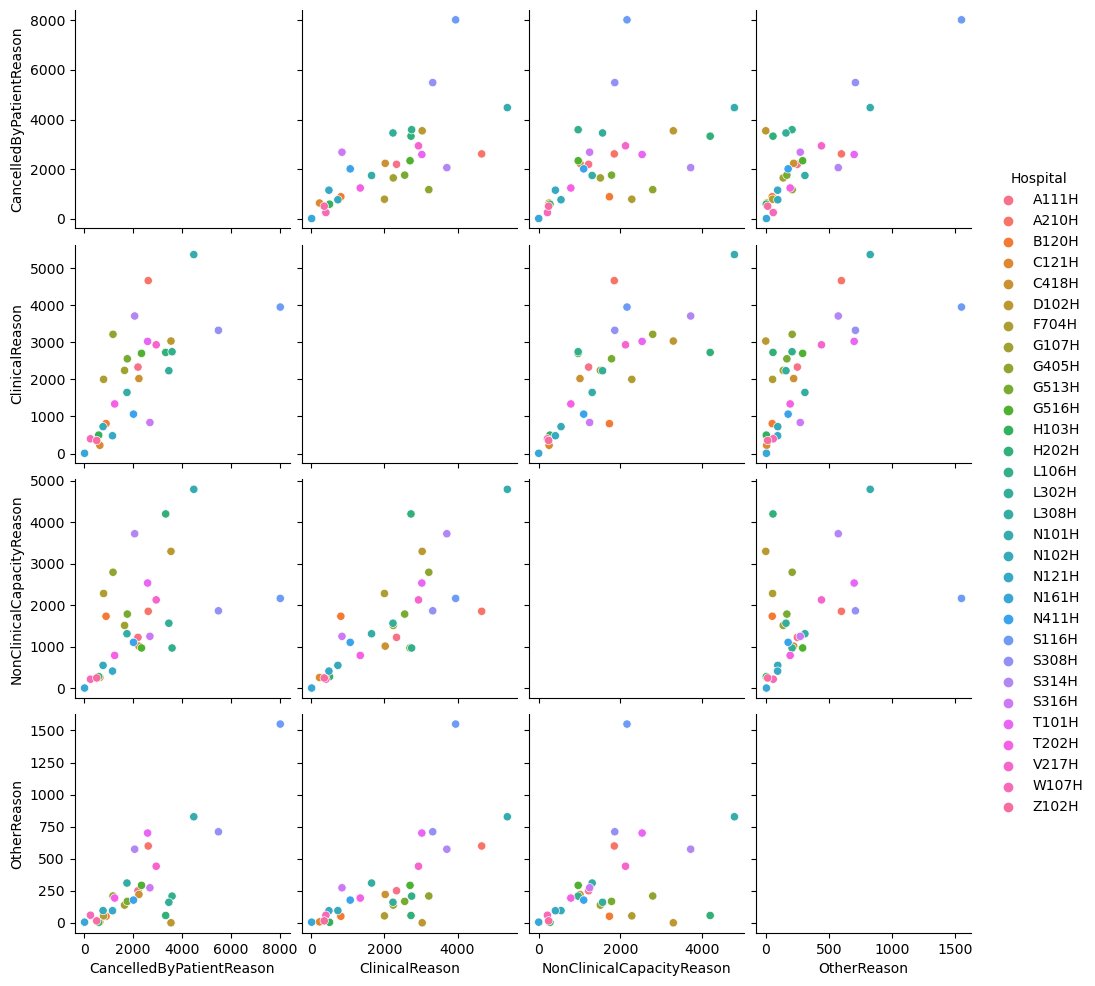

In [58]:
cancellations_hospital_clean = cancellations_hospital_clean[["Hospital","CancelledByPatientReason","ClinicalReason","NonClinicalCapacityReason","OtherReason"]]
sns.pairplot(data=cancellations_hospital_clean, hue="Hospital")

In [104]:
cancellations_hospital_clean_hos.drop(columns=["TotalOperations","TotalCancelled"], inplace=True)

PC1 explains 74% of the variance.
PC2 explains 18% of the variance.
PC3 explains 5% of the variance.
PC4 explains 3% of the variance.


'\nfor i in range(len(result_index[\'Hospital\'])):\n    ax.text(result_index[0][i], result_index[1][i], result_index["Hospital"][i])'

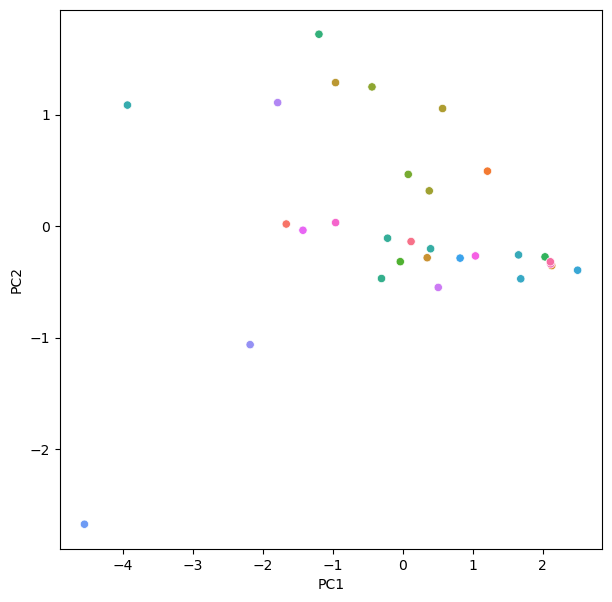

In [106]:
def standardize(df):
    standardized = pd.DataFrame()
    for col in df.columns: # We can apply mathematical operation to entire columns at once, as they are built on top of numpy arrays
        standardized[col] = (df[col]-df[col].mean())/df[col].std() #For each column move the data s.t. it is centered around 0 and has variance=1
    return standardized

def principal_component_analysis(df):
    standardized = standardize(df)
    cov_matrix = np.cov(standardized.values.T) # Transpose the dataset, as pandas stores data in rows x features and the covariance would be computed as the covariance of the rows, but we are interested in the covariance of the features
    return np.linalg.eig(cov_matrix)

def sort_eigenvalues(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    return eigenvalues, eigenvectors

def principal_component_analysis(df):
    standardized = standardize(df) # Standardise the data
    cov_matrix = np.cov(standardized.values.T) # Compute the covariance matrix 
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) 
    eigenvalues, eigenvectors = sort_eigenvalues(eigenvalues, eigenvectors)
    for i in range(len(eigenvalues)):
        print('PC' + str(i+1) + ' explains ' + str(round((eigenvalues[i] / np.sum(eigenvalues))*100)) + '% of the variance.')
    return (eigenvalues, eigenvectors)

standardized = standardize(cancellations_hospital_clean_hos)
e_values, e_vectors = principal_component_analysis(cancellations_hospital_clean_hos) #e_vectors is already in the right format
result = standardized.dot(e_vectors[:,:2])
result_index = result.reset_index()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x= result_index[0], y = result_index[1], hue=result_index["Hospital"])
plt.xlabel('PC1')
plt.ylabel('PC2')

ax.get_legend().remove()
"""
for i in range(len(result_index['Hospital'])):
    ax.text(result_index[0][i], result_index[1][i], result_index["Hospital"][i])"""

In [90]:
hospital_names[hospital_names["HospitalCode"] == "S116H"]

,_id,HospitalCode,HospitalName,AddressLine1,AddressLine2,AddressLine2QF,AddressLine3,AddressLine3QF,AddressLine4,AddressLine4QF,Postcode,HealthBoard,HSCP,CouncilArea,IntermediateZone,DataZone
209,210,S116H,Western General Hospital,Crewe Road South,Edinburgh,NaN,NaN,z,NaN,z,EH4 2XU,S08000024,S37000012,S12000036,S02001663,S01008890


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


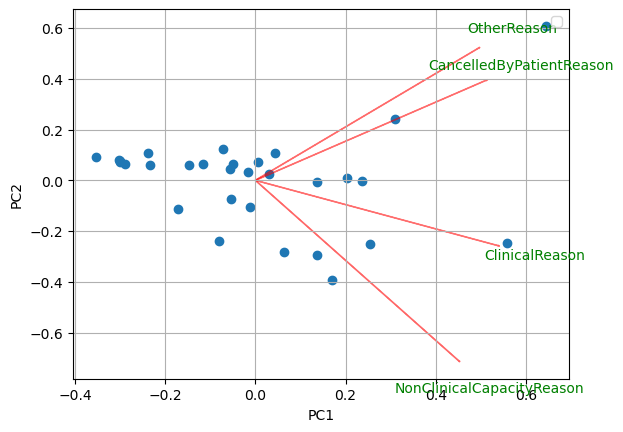

In [111]:
scaler = StandardScaler()
scaler.fit(cancellations_hospital_clean_hos)
X=scaler.transform(cancellations_hospital_clean_hos)    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), list(cancellations_hospital_clean_hos))
plt.show()